In [16]:
### The purpose of this notebook is to document the basic use of the libs.

import sys
import pandas as pd
import seaborn as sns

sys.path.append('..')
from lib.utils import load_occupancy_by_zip_code
from lib.utils import load_sf_acs_data_yearly

In [6]:
zips = load_sf_acs_data_yearly().loc[:, 'Zip Code'].unique()

/opt/homebrew/lib/python3.10/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


<Axes: ylabel='Unique ID'>

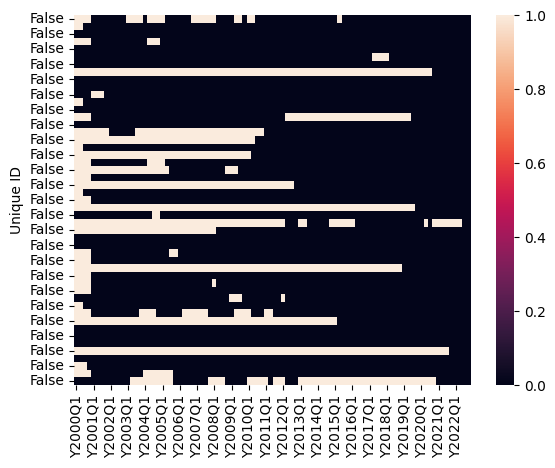

In [37]:
t = load_occupancy_by_zip_code()
sf_zips = t.loc[(t.loc[:, 'Market Name'].str.upper().str.contains('SAN FRAN')).fillna(False), 'Unique ID']


y_cols = ['Unique ID']
for col in t.columns:
    if col[0] == 'Y':
        y_cols.append(col)


sns.heatmap( (t.loc[(t.loc[:, 'Unique ID'].isin(sf_zips)),y_cols].isnull()).set_index('Unique ID') )


In [38]:
# pd.merge( pd.DataFrame(zips), sf_zips)
acs_zips = pd.DataFrame(zips).rename(columns={0: 'zip_code'}).astype(str)
sf_zips = sf_zips.reset_index(drop=True).to_frame().rename(columns={'Unique ID' : 'zip_code'}).astype(str)



SyntaxError: unmatched ')' (838503294.py, line 1)